In [114]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import metrics
from sklearn import model_selection
from sklearn import preprocessing
import matplotlib
matplotlib.rcParams["font.family"] = "SimHei"

乳腺癌诊断

In [115]:
breast_cancer=pd.read_csv(r"D:\数据科学导引\2023年秋数据科学导论大作业\大作业数据集\乳腺癌诊断数据集\wisc_bc_data.csv")
breast_cancer

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [116]:
#数据预处理
del breast_cancer["id"]
dignosis_dict = {"B":0,"M":1}
breast_cancer["diagnosis"] = breast_cancer["diagnosis"].map(dignosis_dict)
breast_cancer

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,1,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,1,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,1,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,1,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [117]:
#数据标准化处理
def min_max_normalize(x):
    return (x - x.min())/(x.max() - x.min())

for col in breast_cancer.columns[1:31]:
    breast_cancer[col] = min_max_normalize(breast_cancer[col])
breast_cancer

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,0.521037,0.022658,0.545989,0.363733,0.593753,0.792037,0.703140,0.731113,0.686364,...,0.620776,0.141525,0.668310,0.450698,0.601136,0.619292,0.568610,0.912027,0.598462,0.418864
1,1,0.643144,0.272574,0.615783,0.501591,0.289880,0.181768,0.203608,0.348757,0.379798,...,0.606901,0.303571,0.539818,0.435214,0.347553,0.154563,0.192971,0.639175,0.233590,0.222878
2,1,0.601496,0.390260,0.595743,0.449417,0.514309,0.431017,0.462512,0.635686,0.509596,...,0.556386,0.360075,0.508442,0.374508,0.483590,0.385375,0.359744,0.835052,0.403706,0.213433
3,1,0.210090,0.360839,0.233501,0.102906,0.811321,0.811361,0.565604,0.522863,0.776263,...,0.248310,0.385928,0.241347,0.094008,0.915472,0.814012,0.548642,0.884880,1.000000,0.773711
4,1,0.629893,0.156578,0.630986,0.489290,0.430351,0.347893,0.463918,0.518390,0.378283,...,0.519744,0.123934,0.506948,0.341575,0.437364,0.172415,0.319489,0.558419,0.157500,0.142595
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,1,0.690000,0.428813,0.678668,0.566490,0.526948,0.296055,0.571462,0.690358,0.336364,...,0.623266,0.383262,0.576174,0.452664,0.461137,0.178527,0.328035,0.761512,0.097575,0.105667
565,1,0.622320,0.626987,0.604036,0.474019,0.407782,0.257714,0.337395,0.486630,0.349495,...,0.560655,0.699094,0.520892,0.379915,0.300007,0.159997,0.256789,0.559450,0.198502,0.074315
566,1,0.455251,0.621238,0.445788,0.303118,0.288165,0.254340,0.216753,0.263519,0.267677,...,0.393099,0.589019,0.379949,0.230731,0.282177,0.273705,0.271805,0.487285,0.128721,0.151909
567,1,0.644564,0.663510,0.665538,0.475716,0.588336,0.790197,0.823336,0.755467,0.675253,...,0.633582,0.730277,0.668310,0.402035,0.619626,0.815758,0.749760,0.910653,0.497142,0.452315


In [118]:
print(breast_cancer['diagnosis'].value_counts())
print(breast_cancer['diagnosis'].value_counts()/len(breast_cancer['diagnosis']))

diagnosis
0    357
1    212
Name: count, dtype: int64
diagnosis
0    0.627417
1    0.372583
Name: count, dtype: float64


In [119]:
Y=breast_cancer['diagnosis']
character=breast_cancer.columns[2:31]
X=preprocessing.scale(breast_cancer[character])

In [120]:
#划分训练集和测试集
X_train,X_test,Y_train,Y_test=model_selection.train_test_split(X,Y,test_size=0.2,random_state=1)

In [121]:
#根据良性和恶性比例查看划分是否合理
print(Y_train.value_counts()/len(Y_train))
print(Y_test.value_counts()/len(Y_test))

diagnosis
0    0.626374
1    0.373626
Name: count, dtype: float64
diagnosis
0    0.631579
1    0.368421
Name: count, dtype: float64


In [122]:
#模型构建
from sklearn.svm import SVC
SVC_model = SVC(C = 1, kernel = "linear")
SVC_model.fit(X_train, Y_train)
Y_pred = SVC_model.predict(X_test)

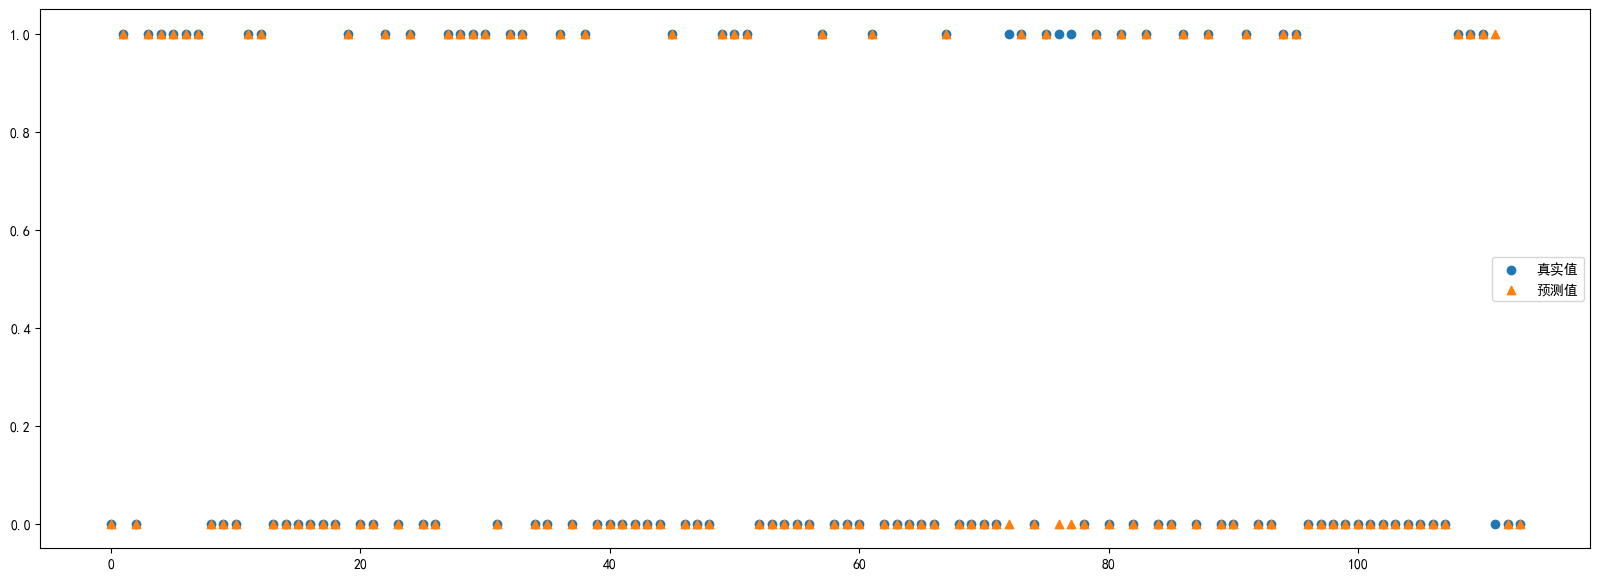

In [123]:
#预测结果可视化
plt.figure(figsize=(20,7))
plt.scatter(list(range(0,len(X_test))),Y_test,marker='o',label='真实值')
plt.scatter(list(range(0,len(X_test))),Y_pred,marker='^',label='预测值')
plt.legend()
plt.show()

In [124]:
#模型性能评估
accuracy = metrics.accuracy_score(Y_test, Y_pred)
confusion_mat = metrics.confusion_matrix(Y_test, Y_pred)
print ("\t正确率: ", '%.2f'%(accuracy*100) + "%")
print ("\t假阴性：",confusion_mat[0,1])
print ("","\t假阳性：",confusion_mat[1,0])

	正确率:  96.49%
	假阴性： 1
 	假阳性： 3


In [125]:
kernels = ["rbf","poly","sigmoid"]
for kernel in kernels:
    SVC_model = SVC(C = 1, kernel = kernel)
    SVC_model.fit(X_train, Y_train)
    Y_pred = SVC_model.predict(X_test)
    accuracy = metrics.accuracy_score(Y_test, Y_pred)
    confusion_mat = metrics.confusion_matrix(Y_test, Y_pred)
    print ("核函数： ",kernel)
    print ("\t正确率: ", '%.2f'%(accuracy*100) + "%")
    print ("\t假阴性：",confusion_mat[0,1])
    print ("","\t假阳性：",confusion_mat[1,0])

核函数：  rbf
	正确率:  97.37%
	假阴性： 1
 	假阳性： 2
核函数：  poly
	正确率:  88.60%
	假阴性： 0
 	假阳性： 13
核函数：  sigmoid
	正确率:  94.74%
	假阴性： 0
 	假阳性： 6


In [126]:
c_list = [0.01, 0.1, 1, 10, 100]
for C in c_list:
    SVC_model = SVC(C = C, kernel = "rbf")
    SVC_model.fit(X_train, Y_train)
    Y_pred = SVC_model.predict(X_test)
    accuracy = metrics.accuracy_score(Y_test, Y_pred)
    confusion_mat = metrics.confusion_matrix(Y_test, Y_pred)
    print ("惩罚参数： ",C)
    print ("\t正确率: ", '%.2f'%(accuracy*100) + "%")
    print ("\t假阴性：",confusion_mat[0,1])
    print ("","\t假阳性：",confusion_mat[1,0])

惩罚参数：  0.01
	正确率:  63.16%
	假阴性： 0
 	假阳性： 42
惩罚参数：  0.1
	正确率:  94.74%
	假阴性： 1
 	假阳性： 5
惩罚参数：  1
	正确率:  97.37%
	假阴性： 1
 	假阳性： 2
惩罚参数：  10
	正确率:  95.61%
	假阴性： 1
 	假阳性： 4
惩罚参数：  100
	正确率:  95.61%
	假阴性： 2
 	假阳性： 3


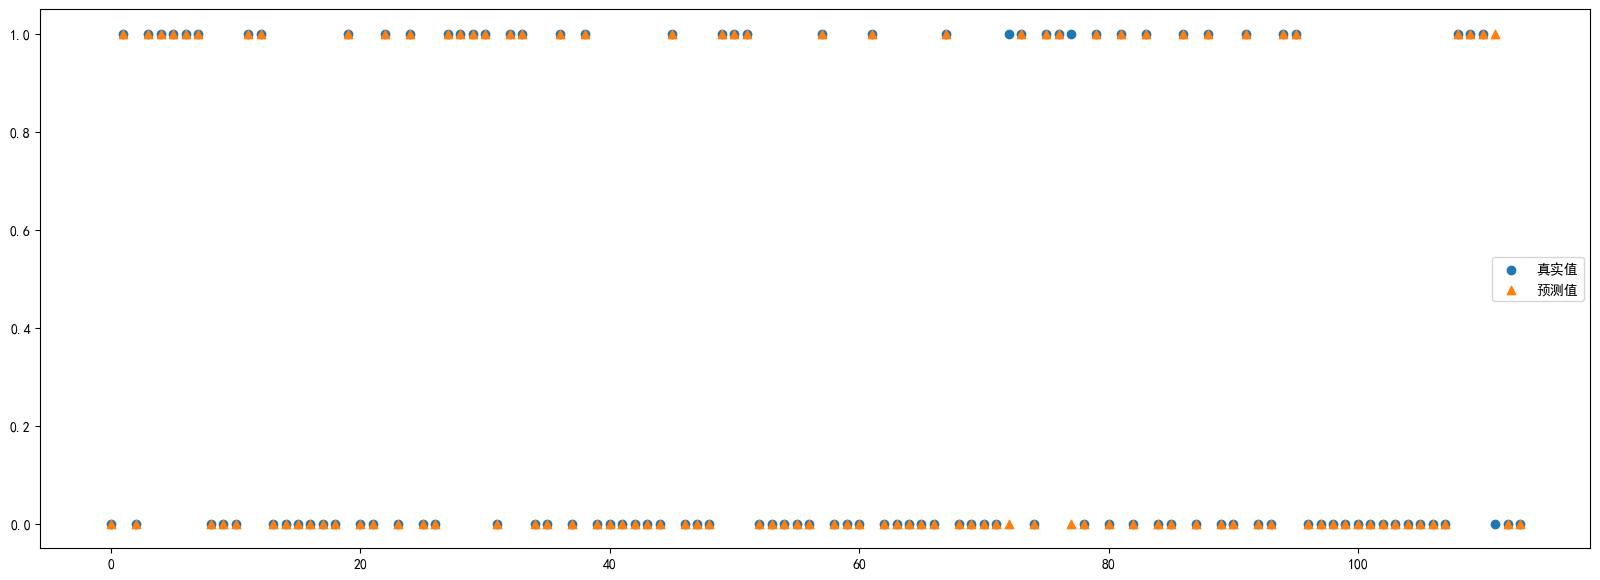

	正确率:  97.37%
	假阴性： 1
 	假阳性： 2


In [127]:
#当核函数为RBF，惩罚参数为1时，模型诊断乳腺癌的效果最好
SVC_model = SVC(C = 1, kernel = "rbf")
SVC_model.fit(X_train, Y_train)
Y_pred = SVC_model.predict(X_test)
accuracy = metrics.accuracy_score(Y_test, Y_pred)
confusion_mat = metrics.confusion_matrix(Y_test, Y_pred)
plt.figure(figsize=(20,7))
plt.scatter(list(range(0,len(X_test))),Y_test,marker='o',label='真实值')
plt.scatter(list(range(0,len(X_test))),Y_pred,marker='^',label='预测值')
plt.legend()
plt.show()
print ("\t正确率: ", '%.2f'%(accuracy*100) + "%")
print ("\t假阴性：",confusion_mat[0,1])
print ("","\t假阳性：",confusion_mat[1,0])

间皮瘤

In [128]:
Mesothelioma=pd.read_csv(r"D:\数据科学导引\2023年秋数据科学导论大作业\大作业数据集\恶性间皮瘤数据集\Mesothelioma.csv")
Mesothelioma

,age,gender,city,asbestos exposure,type of MM,duration of asbestos exposure,diagnosis method,keep side,cytology,duration of symptoms,...,pleural lactic dehydrogenise,pleural protein,pleural albumin,pleural glucose,dead or not,pleural effusion,pleural thickness on tomography,pleural level of acidity (pH),C-reactive protein (CRP),class of diagnosis
0,47,1,0,1,0,20,1,0,1,24.0,...,289,0.0,0.00,79,1,0,0,0,34,0
1,55,1,0,1,0,45,1,0,0,1.0,...,7541,1.6,0.80,6,1,1,1,1,42,0
2,29,1,1,1,0,23,0,1,0,1.0,...,480,0.0,0.00,90,1,0,0,0,43,1
3,39,1,0,1,0,10,1,0,0,3.0,...,459,5.0,2.80,45,1,1,0,0,21,0
4,47,1,0,1,0,10,1,1,1,1.5,...,213,3.6,1.95,53,1,1,0,0,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319,75,1,1,1,0,50,1,1,0,9.0,...,323,4.9,2.60,23,1,1,1,0,76,0
320,66,1,1,1,0,41,1,1,0,9.0,...,323,4.9,2.60,23,1,1,1,0,67,0
321,58,1,6,1,0,40,1,0,0,8.0,...,300,5.1,2.20,35,1,1,0,1,68,0
322,42,1,6,0,0,0,0,1,0,2.0,...,3000,2.4,1.20,2,1,1,1,0,78,1


In [129]:
#数据标准化处理
for col in Mesothelioma.columns[0:35]:
    Mesothelioma[col] = min_max_normalize(Mesothelioma[col])
Mesothelioma

,age,gender,city,asbestos exposure,type of MM,duration of asbestos exposure,diagnosis method,keep side,cytology,duration of symptoms,...,pleural lactic dehydrogenise,pleural protein,pleural albumin,pleural glucose,dead or not,pleural effusion,pleural thickness on tomography,pleural level of acidity (pH),C-reactive protein (CRP),class of diagnosis
0,0.424242,1.0,0.000,1.0,0.0,0.285714,1.0,0.0,1.0,0.456311,...,0.024088,0.000000,0.000000,0.516779,1.0,0.0,0.0,0.0,0.250000,0.0
1,0.545455,1.0,0.000,1.0,0.0,0.642857,1.0,0.0,0.0,0.009709,...,1.000000,0.238806,0.181818,0.026846,1.0,1.0,1.0,1.0,0.336957,0.0
2,0.151515,1.0,0.125,1.0,0.0,0.328571,0.0,0.5,0.0,0.009709,...,0.049791,0.000000,0.000000,0.590604,1.0,0.0,0.0,0.0,0.347826,1.0
3,0.303030,1.0,0.000,1.0,0.0,0.142857,1.0,0.0,0.0,0.048544,...,0.046965,0.746269,0.636364,0.288591,1.0,1.0,0.0,0.0,0.108696,0.0
4,0.424242,1.0,0.000,1.0,0.0,0.142857,1.0,0.5,1.0,0.019417,...,0.013861,0.537313,0.443182,0.342282,1.0,1.0,0.0,0.0,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319,0.848485,1.0,0.125,1.0,0.0,0.714286,1.0,0.5,0.0,0.165049,...,0.028664,0.731343,0.590909,0.140940,1.0,1.0,1.0,0.0,0.706522,0.0
320,0.712121,1.0,0.125,1.0,0.0,0.585714,1.0,0.5,0.0,0.165049,...,0.028664,0.731343,0.590909,0.140940,1.0,1.0,1.0,0.0,0.608696,0.0
321,0.590909,1.0,0.750,1.0,0.0,0.571429,1.0,0.0,0.0,0.145631,...,0.025569,0.761194,0.500000,0.221477,1.0,1.0,0.0,1.0,0.619565,0.0
322,0.348485,1.0,0.750,0.0,0.0,0.000000,0.0,0.5,0.0,0.029126,...,0.388911,0.358209,0.272727,0.000000,1.0,1.0,1.0,0.0,0.728261,1.0


In [130]:
print(Mesothelioma['class of diagnosis'].value_counts())
print(Mesothelioma['class of diagnosis'].value_counts()/len(Mesothelioma['class of diagnosis']))

class of diagnosis
0.0    228
1.0     96
Name: count, dtype: int64
class of diagnosis
0.0    0.703704
1.0    0.296296
Name: count, dtype: float64


In [131]:
Y=Mesothelioma['class of diagnosis']
character=Mesothelioma.columns[0:34]
X=preprocessing.scale(Mesothelioma[character])

In [132]:
X_train,X_test,Y_train,Y_test=model_selection.train_test_split(X,Y,test_size=0.3,random_state=6)

In [133]:
#根据良性和恶性比例查看划分是否合理
print(Y_train.value_counts()/len(Y_train))
print(Y_test.value_counts()/len(Y_test))

class of diagnosis
0.0    0.699115
1.0    0.300885
Name: count, dtype: float64
class of diagnosis
0.0    0.714286
1.0    0.285714
Name: count, dtype: float64


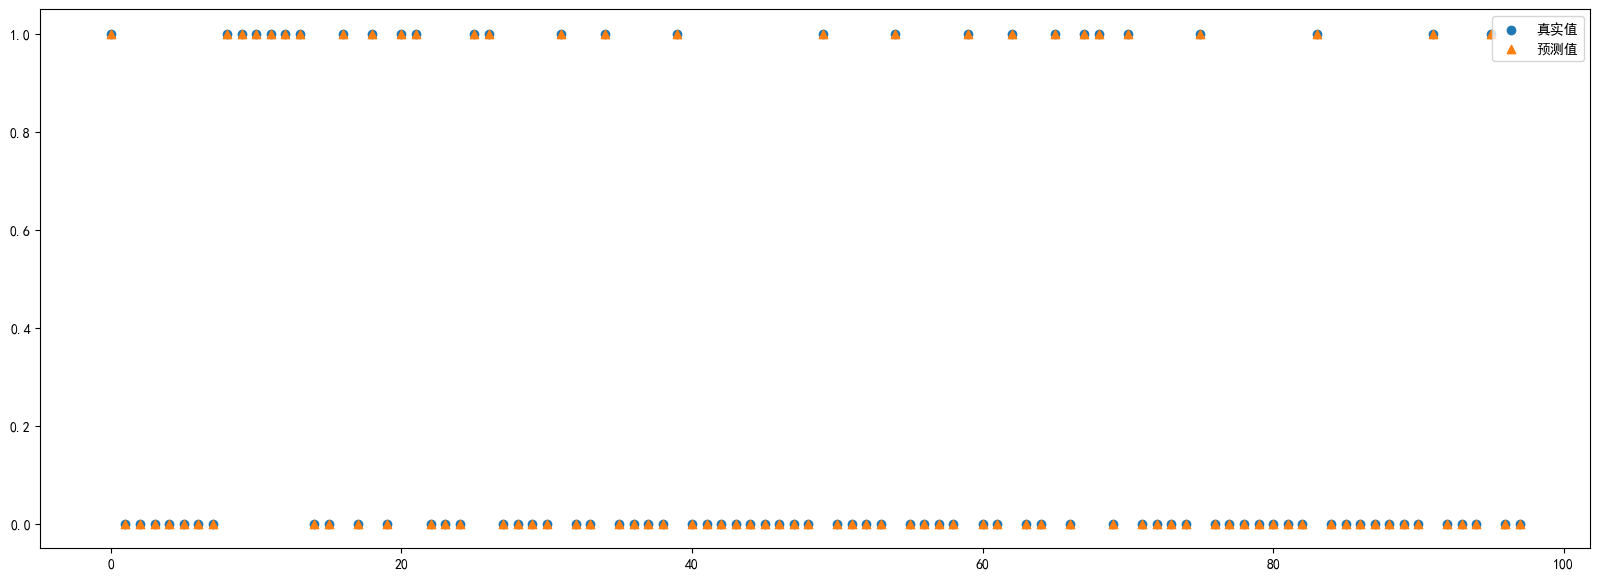

In [134]:
SVC_model = SVC(C = 1, kernel = "rbf")
SVC_model.fit(X_train, Y_train)
Y_pred = SVC_model.predict(X_test)
accuracy = metrics.accuracy_score(Y_test, Y_pred)
confusion_mat = metrics.confusion_matrix(Y_test, Y_pred)
plt.figure(figsize=(20,7))
plt.scatter(list(range(0,len(X_test))),Y_test,marker='o',label='真实值')
plt.scatter(list(range(0,len(X_test))),Y_pred,marker='^',label='预测值')
plt.legend()
plt.show()

In [135]:
accuracy = metrics.accuracy_score(Y_test, Y_pred)
confusion_mat = metrics.confusion_matrix(Y_test, Y_pred)
print ("\t正确率: ", '%.2f'%(accuracy*100) + "%")
print ("\t假阴性：",confusion_mat[0,1])
print ("","\t假阳性：",confusion_mat[1,0])

	正确率:  100.00%
	假阴性： 0
 	假阳性： 0


字符识别

In [136]:
letter_recognition=pd.read_csv(r"D:\数据科学导引\2023年秋数据科学导论大作业\大作业数据集\光学字符识别数据集\letterecognition.csv")
letter_recognition

,letter,xbox,ybox,width,height,onpix,xbar,ybar,x2bar,y2bar,xybar,x2ybar,xy2bar,xedge,xedgey,yedge,yedgex
0,T,2,8,3,5,1,8,13,0,6,6,10,8,0,8,0,8
1,I,5,12,3,7,2,10,5,5,4,13,3,9,2,8,4,10
2,D,4,11,6,8,6,10,6,2,6,10,3,7,3,7,3,9
3,N,7,11,6,6,3,5,9,4,6,4,4,10,6,10,2,8
4,G,2,1,3,1,1,8,6,6,6,6,5,9,1,7,5,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,D,2,2,3,3,2,7,7,7,6,6,6,4,2,8,3,7
19996,C,7,10,8,8,4,4,8,6,9,12,9,13,2,9,3,7
19997,T,6,9,6,7,5,6,11,3,7,11,9,5,2,12,2,4
19998,S,2,3,4,2,1,8,7,2,6,10,6,8,1,9,5,8


In [137]:
letter_recognition["letter"].value_counts().sort_index()

letter
A    789
B    766
C    736
D    805
E    768
F    775
G    773
H    734
I    755
J    747
K    739
L    761
M    792
N    783
O    753
P    803
Q    783
R    758
S    748
T    796
U    813
V    764
W    752
X    787
Y    786
Z    734
Name: count, dtype: int64

In [138]:
Y=letter_recognition["letter"]
character=letter_recognition.columns[1:17]
X=preprocessing.scale(letter_recognition[character])

In [139]:
X_train,X_test,Y_train,Y_test=model_selection.train_test_split(X,Y,test_size=0.3,random_state=6)

In [140]:
SVC_model = SVC(C = 1, kernel = "rbf")
SVC_model.fit(X_train, Y_train)
Y_pred = SVC_model.predict(X_test)
accuracy = metrics.accuracy_score(Y_test, Y_pred)
confusion_mat = metrics.confusion_matrix(Y_test, Y_pred)
accuracy = metrics.accuracy_score(Y_test, Y_pred)
print ("\t正确率: ", '%.2f'%(accuracy*100) + "%")

	正确率:  93.88%


In [141]:
kernels = ["rbf","poly","sigmoid","linear"]
for kernel in kernels:
    SVC_model = SVC(C = 1, kernel = kernel)
    SVC_model.fit(X_train, Y_train)
    Y_pred = SVC_model.predict(X_test)
    accuracy = metrics.accuracy_score(Y_test, Y_pred)
    print ("核函数： ",kernel)
    print ("\t正确率: ", '%.2f'%(accuracy*100) + "%")

核函数：  rbf
	正确率:  93.88%
核函数：  poly
	正确率:  87.73%
核函数：  sigmoid
	正确率:  48.23%
核函数：  linear
	正确率:  84.77%


个人征信

In [142]:
credit=pd.read_csv(r"D:\数据科学导引\2023年秋数据科学导论大作业\大作业数据集\个人信用风险评估数据集\credit.csv")
credit

,checking_balance,months_loan_duration,credit_history,purpose,amount,savings_balance,employment_length,installment_rate,personal_status,other_debtors,...,property,age,installment_plan,housing,existing_credits,job,dependents,telephone,foreign_worker,default
0,< 0 DM,6,critical,radio/tv,1169,unknown,> 7 yrs,4,single male,none,...,real estate,67,none,own,2,skilled employee,1,yes,yes,1
1,1 - 200 DM,48,repaid,radio/tv,5951,< 100 DM,1 - 4 yrs,2,female,none,...,real estate,22,none,own,1,skilled employee,1,none,yes,2
2,unknown,12,critical,education,2096,< 100 DM,4 - 7 yrs,2,single male,none,...,real estate,49,none,own,1,unskilled resident,2,none,yes,1
3,< 0 DM,42,repaid,furniture,7882,< 100 DM,4 - 7 yrs,2,single male,guarantor,...,building society savings,45,none,for free,1,skilled employee,2,none,yes,1
4,< 0 DM,24,delayed,car (new),4870,< 100 DM,1 - 4 yrs,3,single male,none,...,unknown/none,53,none,for free,2,skilled employee,2,none,yes,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,unknown,12,repaid,furniture,1736,< 100 DM,4 - 7 yrs,3,female,none,...,real estate,31,none,own,1,unskilled resident,1,none,yes,1
996,< 0 DM,30,repaid,car (used),3857,< 100 DM,1 - 4 yrs,4,divorced male,none,...,building society savings,40,none,own,1,mangement self-employed,1,yes,yes,1
997,unknown,12,repaid,radio/tv,804,< 100 DM,> 7 yrs,4,single male,none,...,other,38,none,own,1,skilled employee,1,none,yes,1
998,< 0 DM,45,repaid,radio/tv,1845,< 100 DM,1 - 4 yrs,4,single male,none,...,unknown/none,23,none,for free,1,skilled employee,1,yes,yes,2


In [143]:
#离散型变量处理
cols = ['checking_balance','credit_history', 'purpose', 'savings_balance', 'employment_length', 'personal_status', 
        'other_debtors','property','installment_plan','housing','job','telephone','foreign_worker']

col_dicts = {'checking_balance': {'1 - 200 DM': 2,
  '< 0 DM': 1,
  '> 200 DM': 3,
  'unknown': 0},
 'credit_history': {'critical': 0,
  'delayed': 2,
  'fully repaid': 3,
  'fully repaid this bank': 4,
  'repaid': 1},
 'employment_length': {'0 - 1 yrs': 1,
  '1 - 4 yrs': 2,
  '4 - 7 yrs': 3,
  '> 7 yrs': 4,
  'unemployed': 0},
 'foreign_worker': {'no': 1, 'yes': 0},
 'housing': {'for free': 1, 'own': 0, 'rent': 2},
 'installment_plan': {'bank': 1, 'none': 0, 'stores': 2},
 'job': {'mangement self-employed': 3,
  'skilled employee': 2,
  'unemployed non-resident': 0,
  'unskilled resident': 1},
 'other_debtors': {'co-applicant': 2, 'guarantor': 1, 'none': 0},
 'personal_status': {'divorced male': 2,
  'female': 1,
  'married male': 3,
  'single male': 0},
 'property': {'building society savings': 1,
  'other': 3,
  'real estate': 0,
  'unknown/none': 2},
 'purpose': {'business': 5,
  'car (new)': 3,
  'car (used)': 4,
  'domestic appliances': 6,
  'education': 1,
  'furniture': 2,
  'others': 8,
  'radio/tv': 0,
  'repairs': 7,
  'retraining': 9},
 'savings_balance': {'101 - 500 DM': 2,
  '501 - 1000 DM': 3,
  '< 100 DM': 1,
  '> 1000 DM': 4,
  'unknown': 0},
 'telephone': {'none': 1, 'yes': 0}}

for col in cols:
    credit[col] = credit[col].map(col_dicts[col])
    
credit

,checking_balance,months_loan_duration,credit_history,purpose,amount,savings_balance,employment_length,installment_rate,personal_status,other_debtors,...,property,age,installment_plan,housing,existing_credits,job,dependents,telephone,foreign_worker,default
0,1,6,0,0,1169,0,4,4,0,0,...,0,67,0,0,2,2,1,0,0,1
1,2,48,1,0,5951,1,2,2,1,0,...,0,22,0,0,1,2,1,1,0,2
2,0,12,0,1,2096,1,3,2,0,0,...,0,49,0,0,1,1,2,1,0,1
3,1,42,1,2,7882,1,3,2,0,1,...,1,45,0,1,1,2,2,1,0,1
4,1,24,2,3,4870,1,2,3,0,0,...,2,53,0,1,2,2,2,1,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0,12,1,2,1736,1,3,3,1,0,...,0,31,0,0,1,1,1,1,0,1
996,1,30,1,4,3857,1,2,4,2,0,...,1,40,0,0,1,3,1,0,0,1
997,0,12,1,0,804,1,4,4,0,0,...,3,38,0,0,1,2,1,1,0,1
998,1,45,1,0,1845,1,2,4,0,0,...,2,23,0,1,1,2,1,0,0,2


In [144]:
#数据标准化处理
for col in credit.columns[0:20]:
    credit[col] = min_max_normalize(credit[col])
credit

,checking_balance,months_loan_duration,credit_history,purpose,amount,savings_balance,employment_length,installment_rate,personal_status,other_debtors,...,property,age,installment_plan,housing,existing_credits,job,dependents,telephone,foreign_worker,default
0,0.333333,0.029412,0.00,0.000000,0.050567,0.00,1.00,1.000000,0.000000,0.0,...,0.000000,0.857143,0.0,0.0,0.333333,0.666667,0.0,0.0,0.0,1
1,0.666667,0.647059,0.25,0.000000,0.313690,0.25,0.50,0.333333,0.333333,0.0,...,0.000000,0.053571,0.0,0.0,0.000000,0.666667,0.0,1.0,0.0,2
2,0.000000,0.117647,0.00,0.111111,0.101574,0.25,0.75,0.333333,0.000000,0.0,...,0.000000,0.535714,0.0,0.0,0.000000,0.333333,1.0,1.0,0.0,1
3,0.333333,0.558824,0.25,0.222222,0.419941,0.25,0.75,0.333333,0.000000,0.5,...,0.333333,0.464286,0.0,0.5,0.000000,0.666667,1.0,1.0,0.0,1
4,0.333333,0.294118,0.50,0.333333,0.254209,0.25,0.50,0.666667,0.000000,0.0,...,0.666667,0.607143,0.0,0.5,0.333333,0.666667,1.0,1.0,0.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.000000,0.117647,0.25,0.222222,0.081765,0.25,0.75,0.666667,0.333333,0.0,...,0.000000,0.214286,0.0,0.0,0.000000,0.333333,0.0,1.0,0.0,1
996,0.333333,0.382353,0.25,0.444444,0.198470,0.25,0.50,1.000000,0.666667,0.0,...,0.333333,0.375000,0.0,0.0,0.000000,1.000000,0.0,0.0,0.0,1
997,0.000000,0.117647,0.25,0.000000,0.030483,0.25,1.00,1.000000,0.000000,0.0,...,1.000000,0.339286,0.0,0.0,0.000000,0.666667,0.0,1.0,0.0,1
998,0.333333,0.602941,0.25,0.000000,0.087763,0.25,0.50,1.000000,0.000000,0.0,...,0.666667,0.071429,0.0,0.5,0.000000,0.666667,0.0,0.0,0.0,2


In [145]:
print(credit['default'].value_counts()/len(credit['default']))

default
1    0.7
2    0.3
Name: count, dtype: float64


In [146]:
Y=credit['default']
character=credit.columns[0:20]
X=preprocessing.scale(credit[character])

In [147]:
X_train,X_test,Y_train,Y_test=model_selection.train_test_split(X,Y,test_size=0.3,random_state=8)

In [148]:
#根据违约比例查看数据集划分是否合理
print(Y_train.value_counts()/len(Y_train))
print(Y_test.value_counts()/len(Y_test))

default
1    0.7
2    0.3
Name: count, dtype: float64
default
1    0.7
2    0.3
Name: count, dtype: float64


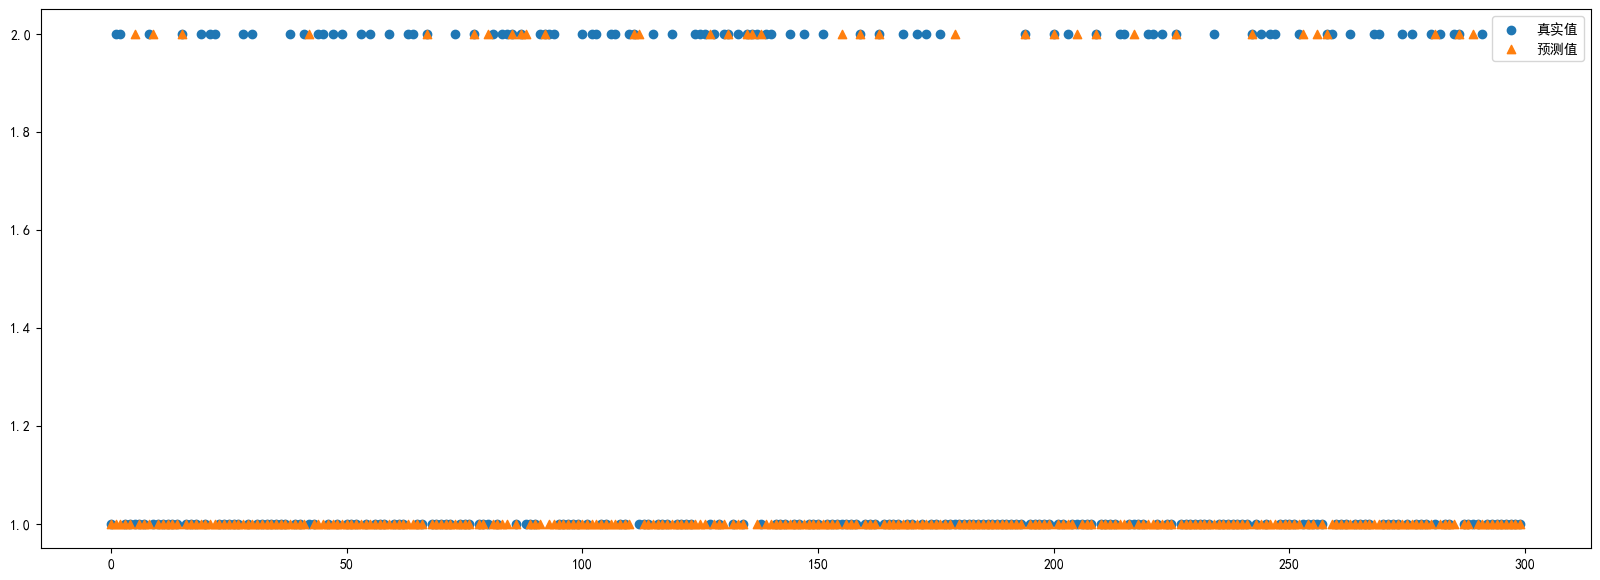

In [149]:
SVC_model = SVC(C = 1, kernel = "rbf")
SVC_model.fit(X_train, Y_train)
Y_pred = SVC_model.predict(X_test)
plt.figure(figsize=(20,7))
plt.scatter(list(range(0,len(X_test))),Y_test,marker='o',label='真实值')
plt.scatter(list(range(0,len(X_test))),Y_pred,marker='^',label='预测值')
plt.legend()
plt.show()

In [150]:
accuracy = metrics.accuracy_score(Y_test, Y_pred)
confusion_mat = metrics.confusion_matrix(Y_test, Y_pred)
print ("\t正确率: ", '%.2f'%(accuracy*100) + "%")
print ("\t误判违约：",confusion_mat[0,1])
print ("","\t误判没违约：",confusion_mat[1,0])

	正确率:  71.00%
	误判违约： 16
 	误判没违约： 71


In [151]:
kernels = ["rbf","poly","sigmoid","linear"]
for kernel in kernels:
    SVC_model = SVC(C = 1, kernel = kernel)
    SVC_model.fit(X_train, Y_train)
    Y_pred = SVC_model.predict(X_test)
    accuracy = metrics.accuracy_score(Y_test, Y_pred)
    confusion_mat = metrics.confusion_matrix(Y_test, Y_pred)
    print ("核函数： ",kernel)
    print ("\t正确率: ", '%.2f'%(accuracy*100) + "%")
    print ("\t误判违约：",confusion_mat[0,1])
    print ("","\t误判没违约：",confusion_mat[1,0])  

核函数：  rbf
	正确率:  71.00%
	误判违约： 16
 	误判没违约： 71
核函数：  poly
	正确率:  71.00%
	误判违约： 16
 	误判没违约： 71
核函数：  sigmoid
	正确率:  67.33%
	误判违约： 34
 	误判没违约： 64
核函数：  linear
	正确率:  69.33%
	误判违约： 18
 	误判没违约： 74


In [152]:
c_list = [0.01, 0.1, 1, 10, 100]
for C in c_list:
    SVC_model = SVC(C = C, kernel = "rbf")
    SVC_model.fit(X_train, Y_train)
    Y_pred = SVC_model.predict(X_test)
    accuracy = metrics.accuracy_score(Y_test, Y_pred)
    confusion_mat = metrics.confusion_matrix(Y_test, Y_pred)
    print ("惩罚参数： ",C)
    print ("\t正确率: ", '%.2f'%(accuracy*100) + "%")
    print ("\t误判违约：",confusion_mat[0,1])
    print ("","\t误判没违约：",confusion_mat[1,0])  
    

惩罚参数：  0.01
	正确率:  70.00%
	误判违约： 0
 	误判没违约： 90
惩罚参数：  0.1
	正确率:  70.00%
	误判违约： 0
 	误判没违约： 90
惩罚参数：  1
	正确率:  71.00%
	误判违约： 16
 	误判没违约： 71
惩罚参数：  10
	正确率:  72.67%
	误判违约： 38
 	误判没违约： 44
惩罚参数：  100
	正确率:  70.67%
	误判违约： 47
 	误判没违约： 41


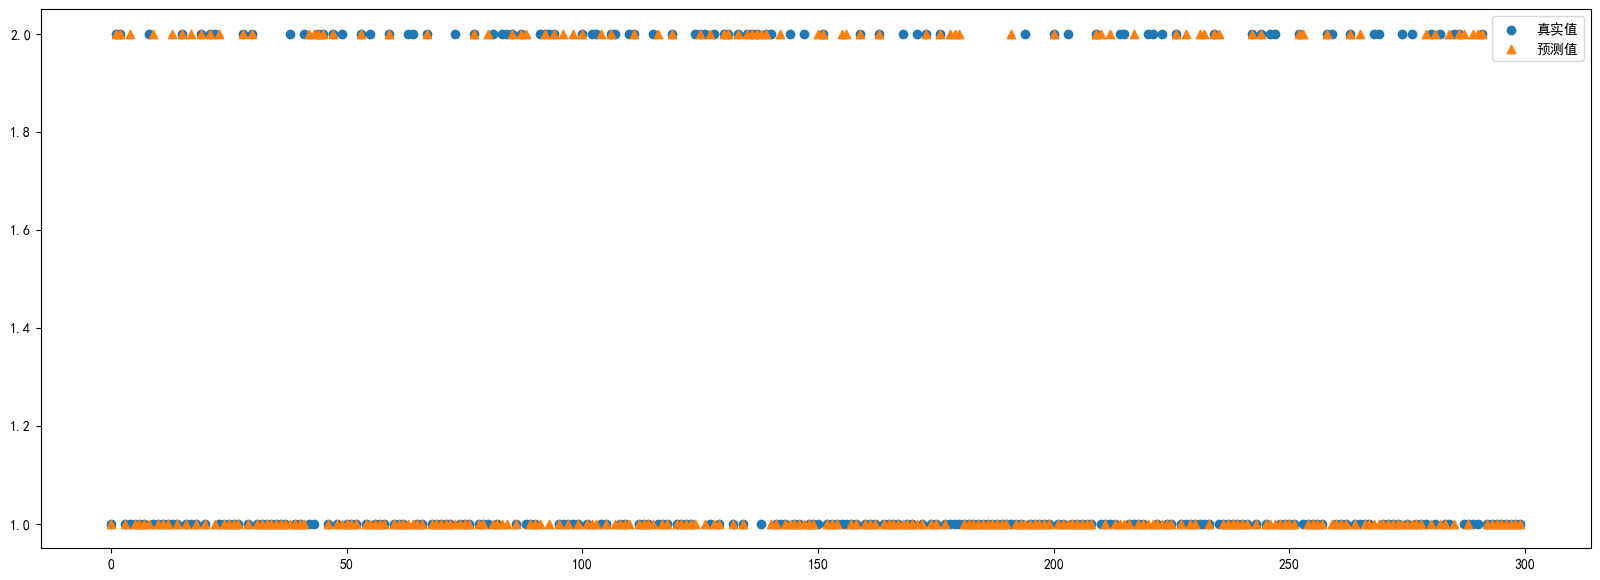

	正确率:  72.67%
	误判违约： 38
 	误判没违约： 44


In [153]:
#核函数为rbf，惩罚参数为10时模型效果较好
SVC_model = SVC(C = 10, kernel = "rbf")
SVC_model.fit(X_train, Y_train)
Y_pred = SVC_model.predict(X_test)
plt.figure(figsize=(20,7))
plt.scatter(list(range(0,len(X_test))),Y_test,marker='o',label='真实值')
plt.scatter(list(range(0,len(X_test))),Y_pred,marker='^',label='预测值')
plt.legend()
plt.show()
accuracy = metrics.accuracy_score(Y_test, Y_pred)
confusion_mat = metrics.confusion_matrix(Y_test, Y_pred)
print ("\t正确率: ", '%.2f'%(accuracy*100) + "%")
print ("\t误判违约：",confusion_mat[0,1])
print ("","\t误判没违约：",confusion_mat[1,0])  

红酒品质

In [154]:
winequality_red=pd.read_csv(r"D:\数据科学导引\2023年秋数据科学导论大作业\大作业数据集\红酒品质数据集\winequality-red.csv",sep=';')
winequality_red

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [155]:
#数据标准化处理
for col in winequality_red.columns[0:11]:
    winequality_red[col] = min_max_normalize(winequality_red[col])
winequality_red

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,0.247788,0.397260,0.00,0.068493,0.106845,0.140845,0.098940,0.567548,0.606299,0.137725,0.153846,5
1,0.283186,0.520548,0.00,0.116438,0.143573,0.338028,0.215548,0.494126,0.362205,0.209581,0.215385,5
2,0.283186,0.438356,0.04,0.095890,0.133556,0.197183,0.169611,0.508811,0.409449,0.191617,0.215385,5
3,0.584071,0.109589,0.56,0.068493,0.105175,0.225352,0.190813,0.582232,0.330709,0.149701,0.215385,6
4,0.247788,0.397260,0.00,0.068493,0.106845,0.140845,0.098940,0.567548,0.606299,0.137725,0.153846,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,0.141593,0.328767,0.08,0.075342,0.130217,0.436620,0.134276,0.354626,0.559055,0.149701,0.323077,5
1595,0.115044,0.294521,0.10,0.089041,0.083472,0.535211,0.159011,0.370778,0.614173,0.257485,0.430769,6
1596,0.150442,0.267123,0.13,0.095890,0.106845,0.394366,0.120141,0.416300,0.535433,0.251497,0.400000,6
1597,0.115044,0.359589,0.12,0.075342,0.105175,0.436620,0.134276,0.396476,0.653543,0.227545,0.276923,5


In [156]:
print(winequality_red['quality'].value_counts()/len(winequality_red['quality']))

quality
5    0.425891
6    0.398999
7    0.124453
4    0.033146
8    0.011257
3    0.006254
Name: count, dtype: float64


In [157]:
Y=winequality_red['quality']
character=winequality_red.columns[0:11]
X=preprocessing.scale(winequality_red[character])

In [158]:
X_train,X_test,Y_train,Y_test=model_selection.train_test_split(X,Y,test_size=0.3,random_state=5)

In [159]:
#根据红酒品质比例查看数据集划分是否合理
print(Y_train.value_counts()/len(Y_train))
print(Y_test.value_counts()/len(Y_test))

quality
5    0.418231
6    0.408400
7    0.119750
4    0.037534
8    0.009830
3    0.006256
Name: count, dtype: float64
quality
5    0.443750
6    0.377083
7    0.135417
4    0.022917
8    0.014583
3    0.006250
Name: count, dtype: float64


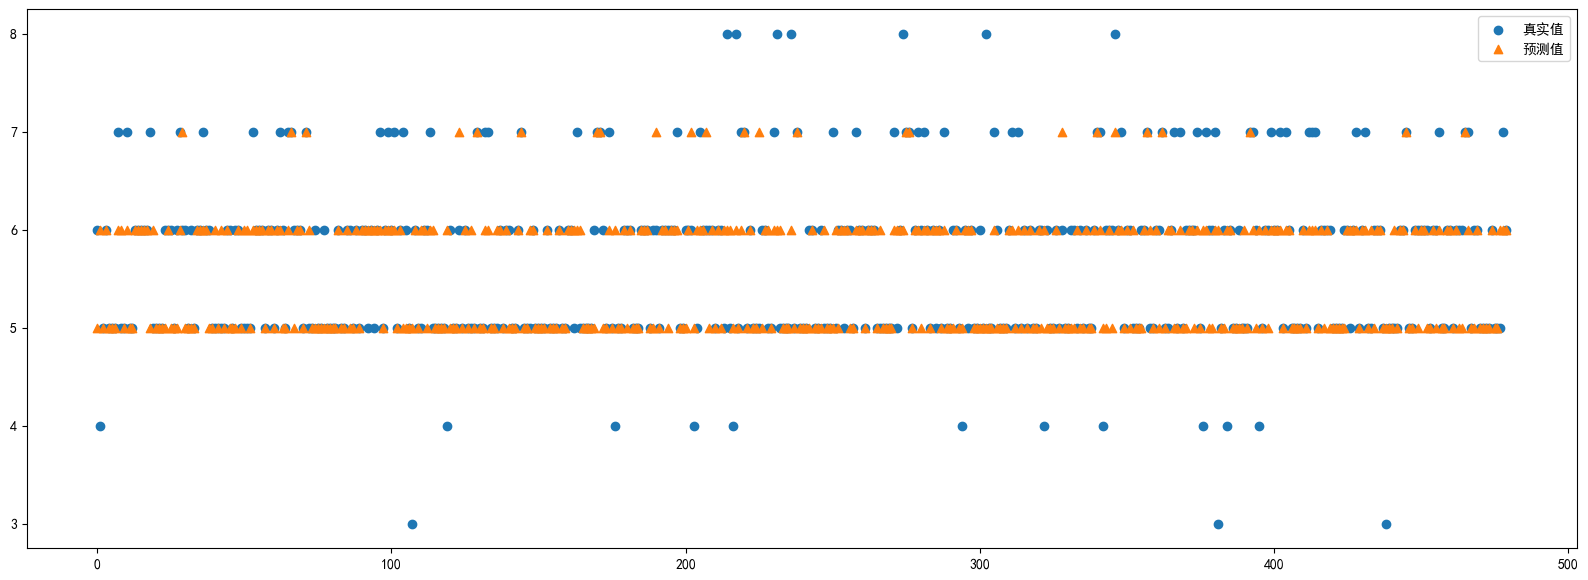

In [160]:
SVC_model = SVC(C = 1, kernel = "rbf")
SVC_model.fit(X_train, Y_train)
Y_pred = SVC_model.predict(X_test)
accuracy = metrics.accuracy_score(Y_test, Y_pred)
confusion_mat = metrics.confusion_matrix(Y_test, Y_pred)
plt.figure(figsize=(20,7))
plt.scatter(list(range(0,len(X_test))),Y_test,marker='o',label='真实值')
plt.scatter(list(range(0,len(X_test))),Y_pred,marker='^',label='预测值')
plt.legend()
plt.show()

In [161]:
accuracy = metrics.accuracy_score(Y_test, Y_pred)
print ("\t正确率: ", '%.2f'%(accuracy*100) + "%")

	正确率:  63.12%


In [162]:
kernels = ["rbf","poly","sigmoid","linear"]
for kernel in kernels:
    SVC_model = SVC(C = 1, kernel = kernel)
    SVC_model.fit(X_train, Y_train)
    Y_pred = SVC_model.predict(X_test)
    accuracy = metrics.accuracy_score(Y_test, Y_pred)
    print ("核函数： ",kernel)
    print ("\t正确率: ", '%.2f'%(accuracy*100) + "%")

核函数：  rbf
	正确率:  63.12%
核函数：  poly
	正确率:  63.12%
核函数：  sigmoid
	正确率:  54.17%
核函数：  linear
	正确率:  59.79%


In [163]:
c_list = [0.01, 0.1, 1, 10,100]
for C in c_list:
    SVC_model = SVC(C = C, kernel = "rbf")
    SVC_model.fit(X_train, Y_train)
    Y_pred = SVC_model.predict(X_test)
    accuracy = metrics.accuracy_score(Y_test, Y_pred)
    print ("惩罚参数： ",C)
    print ("\t正确率: ", '%.2f'%(accuracy*100) + "%") 

惩罚参数：  0.01
	正确率:  44.38%
惩罚参数：  0.1
	正确率:  61.04%
惩罚参数：  1
	正确率:  63.12%
惩罚参数：  10
	正确率:  63.54%
惩罚参数：  100
	正确率:  63.96%


玻璃类型

In [164]:
glass=pd.read_excel(r"D:\数据科学导引\2023年秋数据科学导论大作业\大作业数据集\玻璃类型识别数据集\glass.xlsx")
glass

,refractive index,Sodium,Magnesium,Aluminum,Silicon,Potassium,Calcium,Barium,Iron,Type of glass
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1
...,...,...,...,...,...,...,...,...,...,...
209,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,7
210,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,7
211,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,7
212,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,7


In [165]:
#数据标准化处理
for col in glass.columns[0:9]:
    glass[col] = min_max_normalize(glass[col])
glass

,refractive index,Sodium,Magnesium,Aluminum,Silicon,Potassium,Calcium,Barium,Iron,Type of glass
0,0.432836,0.437594,1.000000,0.252336,0.351786,0.009662,0.308550,0.000000,0.0,1
1,0.283582,0.475188,0.801782,0.333333,0.521429,0.077295,0.223048,0.000000,0.0,1
2,0.220808,0.421053,0.790646,0.389408,0.567857,0.062802,0.218401,0.000000,0.0,1
3,0.285777,0.372932,0.821826,0.311526,0.500000,0.091787,0.259294,0.000000,0.0,1
4,0.275241,0.381955,0.806236,0.295950,0.583929,0.088567,0.245353,0.000000,0.0,1
...,...,...,...,...,...,...,...,...,...,...
209,0.223003,0.512782,0.000000,0.806854,0.500000,0.012882,0.348513,0.336508,0.0,7
210,0.250219,0.630075,0.000000,0.529595,0.580357,0.000000,0.276022,0.504762,0.0,7
211,0.417032,0.545865,0.000000,0.538941,0.644643,0.000000,0.279740,0.520635,0.0,7
212,0.235294,0.548872,0.000000,0.514019,0.678571,0.000000,0.283457,0.498413,0.0,7


In [166]:
print(glass['Type of glass'].value_counts()/len(glass['Type of glass']))

Type of glass
2    0.355140
1    0.327103
7    0.135514
3    0.079439
5    0.060748
6    0.042056
Name: count, dtype: float64


In [167]:
Y=glass['Type of glass']
character=glass.columns[0:9]
X=preprocessing.scale(glass[character])

In [168]:
X_train,X_test,Y_train,Y_test=model_selection.train_test_split(X,Y,test_size=0.3,random_state=12345)

In [169]:
#根据玻璃类型比例查看数据集划分是否合理
print(Y_train.value_counts()/len(Y_train))
print(Y_test.value_counts()/len(Y_test))

Type of glass
2    0.369128
1    0.328859
7    0.134228
3    0.067114
5    0.060403
6    0.040268
Name: count, dtype: float64
Type of glass
1    0.323077
2    0.323077
7    0.138462
3    0.107692
5    0.061538
6    0.046154
Name: count, dtype: float64


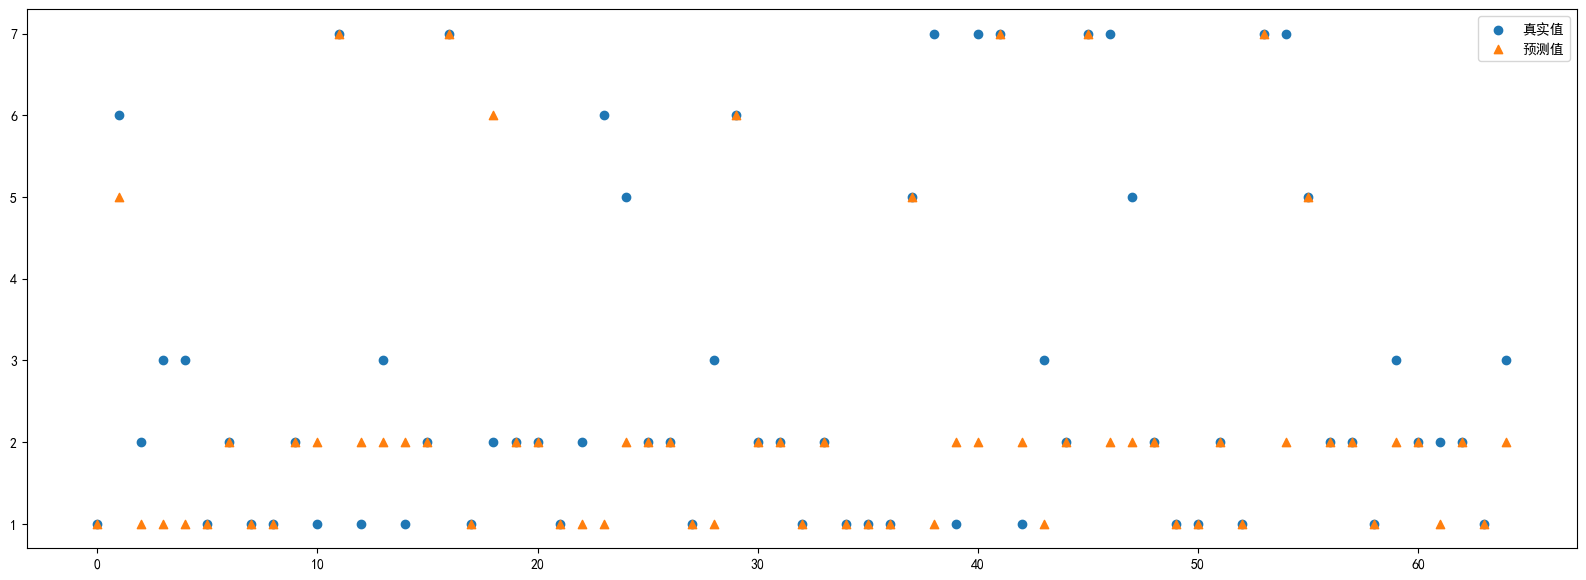

In [170]:
SVC_model = SVC(C = 1, kernel = "rbf")
SVC_model.fit(X_train, Y_train)
Y_pred = SVC_model.predict(X_test)
accuracy = metrics.accuracy_score(Y_test, Y_pred)
confusion_mat = metrics.confusion_matrix(Y_test, Y_pred)
plt.figure(figsize=(20,7))
plt.scatter(list(range(0,len(X_test))),Y_test,marker='o',label='真实值')
plt.scatter(list(range(0,len(X_test))),Y_pred,marker='^',label='预测值')
plt.legend()
plt.show()

In [171]:
accuracy = metrics.accuracy_score(Y_test, Y_pred)
print ("\t正确率: ", '%.2f'%(accuracy*100) + "%")

	正确率:  63.08%


In [172]:
kernels = ["rbf","poly","sigmoid","linear"]
for kernel in kernels:
    SVC_model = SVC(C = 1, kernel = kernel)
    SVC_model.fit(X_train, Y_train)
    Y_pred = SVC_model.predict(X_test)
    accuracy = metrics.accuracy_score(Y_test, Y_pred)
    print ("核函数： ",kernel)
    print ("\t正确率: ", '%.2f'%(accuracy*100) + "%")

核函数：  rbf
	正确率:  63.08%
核函数：  poly
	正确率:  40.00%
核函数：  sigmoid
	正确率:  44.62%
核函数：  linear
	正确率:  58.46%


In [173]:
c_list = [0.01, 0.1, 1, 10, 100]
for C in c_list:
    SVC_model = SVC(C = C, kernel = "rbf")
    SVC_model.fit(X_train, Y_train)
    Y_pred = SVC_model.predict(X_test)
    accuracy = metrics.accuracy_score(Y_test, Y_pred)
    print ("惩罚参数： ",C)
    print ("\t正确率: ", '%.2f'%(accuracy*100) + "%") 

惩罚参数：  0.01
	正确率:  32.31%
惩罚参数：  0.1
	正确率:  41.54%
惩罚参数：  1
	正确率:  63.08%
惩罚参数：  10
	正确率:  69.23%
惩罚参数：  100
	正确率:  69.23%


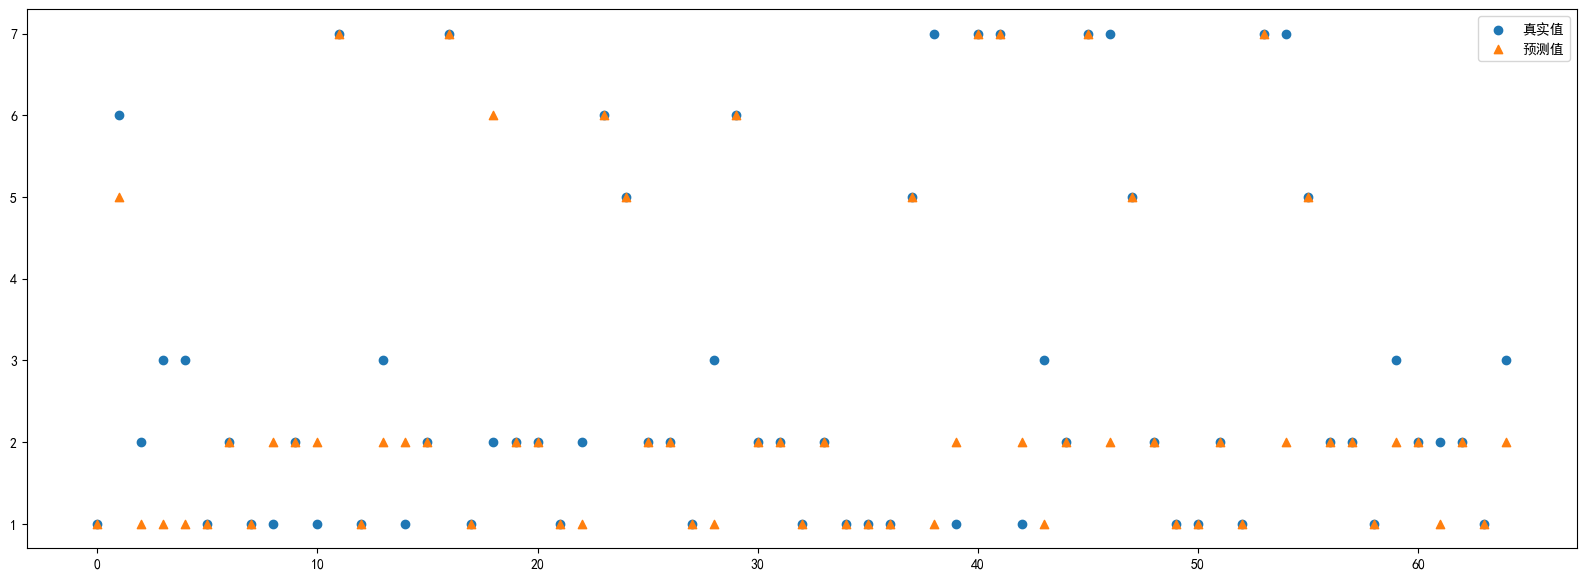

	正确率:  69.23%


In [174]:
#核函数为rbf，惩罚参数为10时模型效果较好
SVC_model = SVC(C = 10, kernel = "rbf")
SVC_model.fit(X_train, Y_train)
Y_pred = SVC_model.predict(X_test)
plt.figure(figsize=(20,7))
plt.scatter(list(range(0,len(X_test))),Y_test,marker='o',label='真实值')
plt.scatter(list(range(0,len(X_test))),Y_pred,marker='^',label='预测值')
plt.legend()
plt.show()
accuracy = metrics.accuracy_score(Y_test, Y_pred)
print ("\t正确率: ", '%.2f'%(accuracy*100) + "%")